# Exploratory Data Analysis

### Import Data as data frame from Database

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from house_price_predictor.data_engineering.loaddata_fromdb import *



/Users/georgethomas/Documents/ML/APR_2023/PROJECTS/HOUSE-PRICE-PREDICTOR/house_price_predictor/data_engineering/
data_engineering


In [2]:
mhp_df = get_df('melb_data') #Get Melbourne Housing Prices Dataframe
mhp_df

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,...,bathroom,car,landsize,buildingarea,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,None,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,None,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,None,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,None,-37.85908,144.89299,Western Metropolitan,6380.0


### Info on Data from source
#### About Dataset
Notes on Specific Variables

Rooms: Number of rooms

Price: Price in dollars


Method: 
<ul>
        <li>S - property sold; </li>
        <li> SP - property sold prior; </li>
        <li> PI - property passed in; </li>
        <li> PN - sold prior not disclosed; </li>
        <li> SN - sold not disclosed; </li>
        <li> NB - no bid; </li>
        <li> VB - vendor bid; </li>
        <li> W - withdrawn prior to auction; </li>
       <li>  SA - sold after auction; </li>
       <li>  SS - sold after auction price not disclosed. </li>
       <li>  N/A - price or highest bid not available.</li>
</ul>

Type: 
<ul>
        <li>br - bedroom(s); </li>
        <li>h - house,cottage,villa, </li>
        <li>semi,terrace; </li>
        <li>u - unit, duplex; </li>
        <li>t - townhouse; </li>
        <li>dev site - development site; </li>
        <li>o res - other residential.</li>
</ul>

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

### Basic exploration of the overall data

#### Statistical Analysis

In [3]:
mhp_df.shape

(13580, 21)

In [4]:
mhp_df_cat=mhp_df.select_dtypes(include='object').columns
mhp_df_num =mhp_df.select_dtypes(exclude='object').columns

In [5]:
mhp_df[mhp_df_num].describe()

,rooms,price,distance,postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,lattitude,longtitude,propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [6]:
mhp_df[mhp_df_cat].describe()

,suburb,address,type,method,sellerg,date,councilarea,regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


In [7]:
mhp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   suburb         13580 non-null  object 
 1   address        13580 non-null  object 
 2   rooms          13580 non-null  int64  
 3   type           13580 non-null  object 
 4   price          13580 non-null  float64
 5   method         13580 non-null  object 
 6   sellerg        13580 non-null  object 
 7   date           13580 non-null  object 
 8   distance       13580 non-null  float64
 9   postcode       13580 non-null  float64
 10  bedroom2       13580 non-null  float64
 11  bathroom       13580 non-null  float64
 12  car            13518 non-null  float64
 13  landsize       13580 non-null  float64
 14  buildingarea   7130 non-null   float64
 15  yearbuilt      8205 non-null   float64
 16  councilarea    12211 non-null  object 
 17  lattitude      13580 non-null  float64
 18  longti

In [8]:
# Percentage of null values in each feature
mhp_df.isnull().mean()*100

suburb            0.000000
address           0.000000
rooms             0.000000
type              0.000000
price             0.000000
method            0.000000
sellerg           0.000000
date              0.000000
distance          0.000000
postcode          0.000000
bedroom2          0.000000
bathroom          0.000000
car               0.456554
landsize          0.000000
buildingarea     47.496318
yearbuilt        39.580265
councilarea      10.081001
lattitude         0.000000
longtitude        0.000000
regionname        0.000000
propertycount     0.000000
dtype: float64

In [9]:
# Number of unique values in each feature
mhp_df.nunique()

suburb             314
address          13378
rooms                9
type                 3
price             2204
method               5
sellerg            268
date                58
distance           202
postcode           198
bedroom2            12
bathroom             9
car                 11
landsize          1448
buildingarea       602
yearbuilt          144
councilarea         33
lattitude         6503
longtitude        7063
regionname           8
propertycount      311
dtype: int64

#### Plots

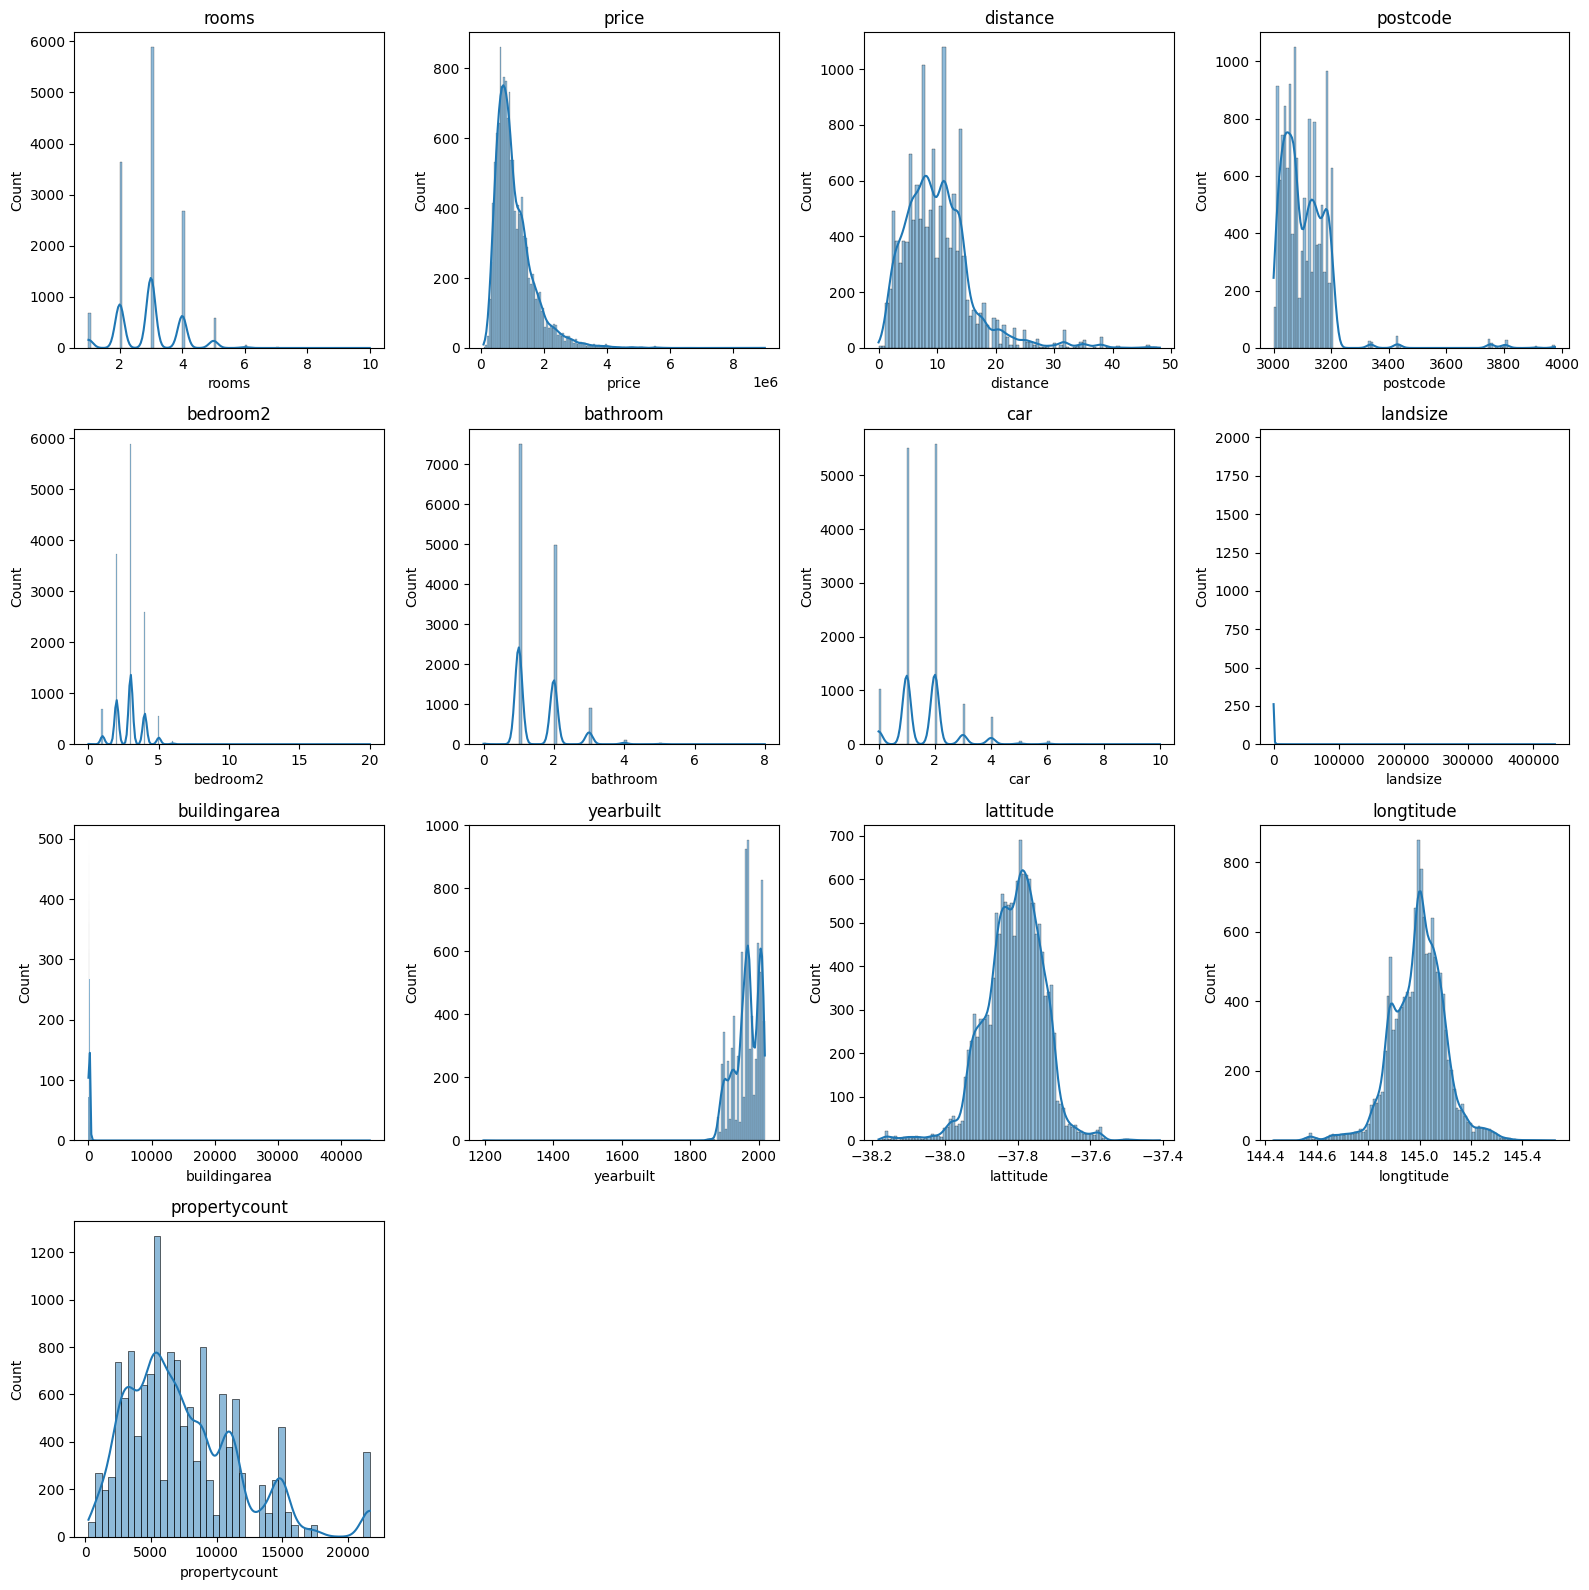

In [10]:
# Histogram plot of all numerical features:
nrows = len(mhp_df_num)//4 +1
ncols = 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4*nrows))

axes=axes.flatten()

for i,col in enumerate(mhp_df_num):
    sns.histplot(data=mhp_df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(col)

for i in range(len(mhp_df_num), nrows*ncols):
    axes[i].axis('off')

plt.tight_layout()

plt.show()

<Axes: >

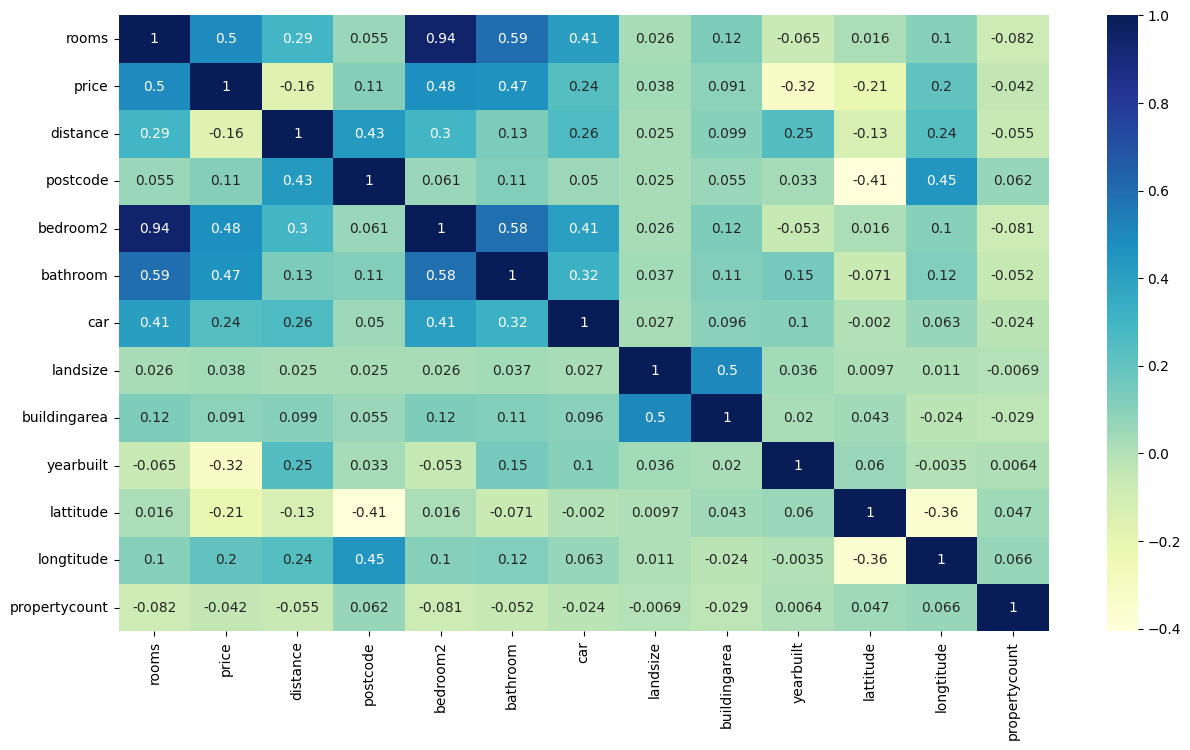

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(mhp_df[mhp_df_num].corr(), annot=True, cmap='YlGnBu')

Oter than 'rooms' and 'bedroom2", there doesn't seem to be any other feature that has a high correlaton with other features.

<Axes: xlabel='lattitude', ylabel='longtitude'>

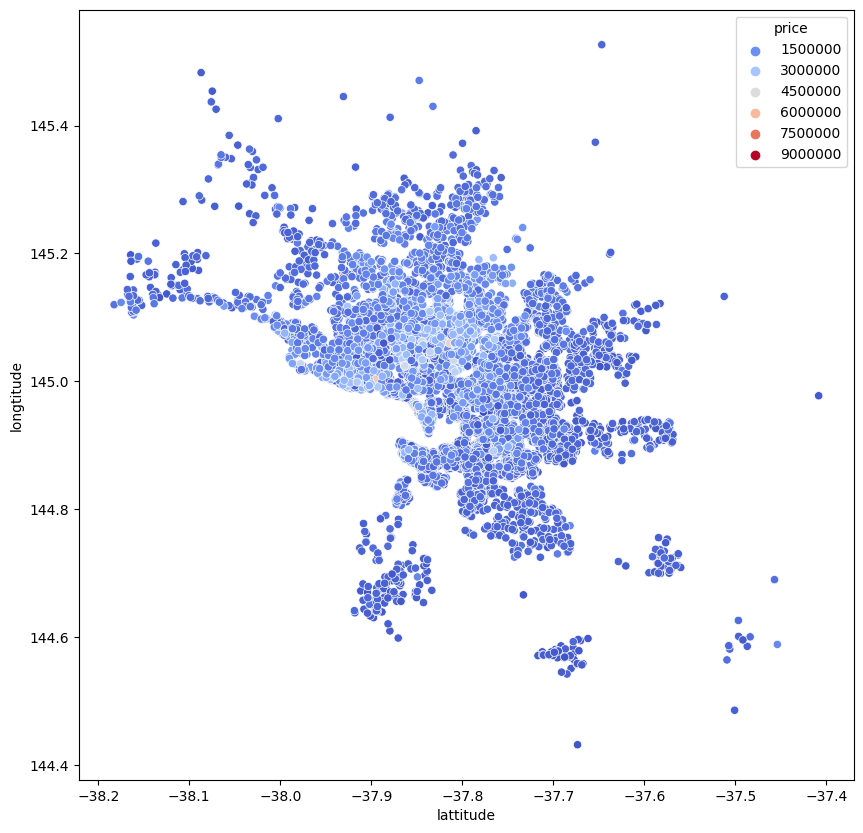

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='lattitude', y='longtitude', data=mhp_df, hue='price', palette='coolwarm')

#### Principle Component Analysis

In [13]:
mhp_df["car_fl"] = mhp_df["car"].fillna(0)
pca1_features = ["rooms", "bathroom", "car_fl", "landsize", "propertycount"]
df1 = mhp_df.loc[:, pca1_features]

# Standardize
df1_scaled = (df1 - df1.mean(axis=0)) / df1.std(axis=0)

from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
df1_pca = pca.fit_transform(df1_scaled)

# Convrt to dataframe
component_names = [f"PC{i+1}" for i in range(df1_pca.shape[1])]

df1_pca = pd.DataFrame(df1_pca, columns = component_names)
df1_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.302598,0.219572,-0.884153,0.133234,0.166414
1,-1.816805,0.270404,-1.007268,-0.739323,0.001961
2,-0.308185,0.163818,-0.944505,-1.672235,0.154390
3,0.204788,0.092181,-0.826863,-0.799737,0.319174
4,0.513358,0.034295,-0.758968,0.524240,-1.229739


In [14]:
loadings = pd.DataFrame(
    pca.components_.T, 
    columns = component_names, 
    index = df1.columns,
)

loadings

,PC1,PC2,PC3,PC4,PC5
rooms,0.622949,-0.049450,0.004882,-0.230078,-0.746009
bathroom,0.592896,-0.034257,0.040849,-0.478779,0.645293
car_fl,0.496368,-0.059888,0.116167,0.843337,0.159123
landsize,0.057259,0.965400,0.253929,0.002777,-0.015373
propertycount,-0.103677,-0.246571,0.959340,-0.081298,-0.038879


In [15]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

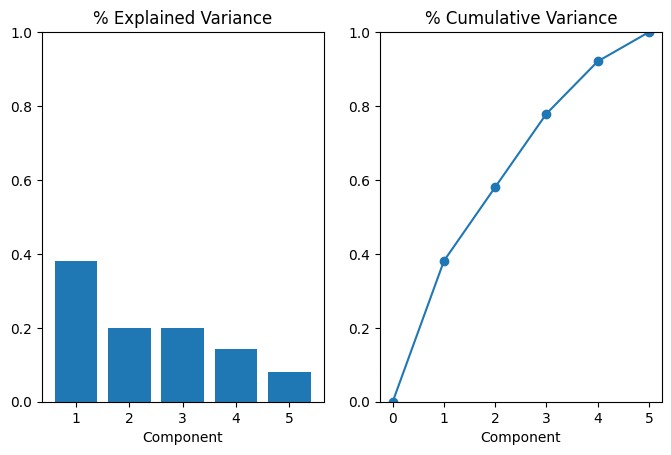

In [16]:
plot_variance(pca)

### Analysis of individual Numerical features

#### Rooms

In [17]:
# Number of houses grouped by umber of rooms
mhp_df['rooms'].value_counts()

3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: rooms, dtype: int64

In [18]:
# Houses with more than 6 rooms
tmp_df = mhp_df[mhp_df['rooms']>6].copy()
tmp_df[mhp_df_num]

,rooms,price,distance,postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,lattitude,longtitude,propertycount
379,8,2950000.0,11.0,3147.0,9.0,7.0,4.0,1472.0,618.00,2009.0,-37.87290,145.07880,3052.0
589,7,1350000.0,9.2,3104.0,7.0,2.0,0.0,942.0,NaN,NaN,-37.79230,145.10290,7809.0
636,7,2600000.0,9.2,3104.0,5.0,3.0,3.0,637.0,529.00,2008.0,-37.78980,145.09670,7809.0
707,7,1005000.0,13.0,3204.0,7.0,3.0,4.0,607.0,NaN,1950.0,-37.92690,145.04700,6795.0
1417,7,1205000.0,5.9,3055.0,7.0,3.0,1.0,447.0,287.00,1982.0,-37.76340,144.94030,7082.0
1926,8,2250000.0,7.8,3058.0,4.0,2.0,4.0,983.0,NaN,NaN,-37.75170,144.96990,11204.0
3255,8,770000.0,10.5,3081.0,8.0,4.0,4.0,638.0,115.00,1960.0,-37.74260,145.04800,2947.0
4285,8,881000.0,8.4,3015.0,6.0,2.0,4.0,663.0,190.00,1920.0,-37.83850,144.88240,5498.0
6201,8,1150000.0,13.8,3107.0,6.0,4.0,3.0,668.0,NaN,NaN,-37.77330,145.11980,5420.0
6881,7,1300000.0,9.8,3040.0,5.0,2.0,2.0,614.0,316.00,1970.0,-37.75000,144.88580,588.0


##### Rooms feature VS Bedrooms feature

In [19]:
# Number of instances where rooms and bedrooms show a different value
df2 = (mhp_df['rooms']-mhp_df['bedroom2']) != 0
display(df2.sum())
print("Percentage of data where the two differ: {:.2f}%".format(df2.sum()*100/mhp_df.shape[0]))

676

Percentage of data where the two differ: 4.98%


In [20]:
df3 = mhp_df[df2]
df3.loc[:, ['rooms', 'bedroom2']]

,rooms,bedroom2
4,4,3.0
6,3,4.0
9,2,3.0
17,3,2.0
43,3,2.0
...,...,...
12411,3,4.0
12875,4,3.0
12926,3,4.0
13213,4,3.0


The 'bedroom2' feature is the 'rooms' feature itself from a different data source. Since the calue differs only for 5% of the data, and since the correlation matrix shows that 'rooms' has a higher correlation with price, we can drop the 'bedroom2' feature.

#### Year Built

In [21]:
mhp_df['yearbuilt'].describe()

count    8205.000000
mean     1964.684217
std        37.273762
min      1196.000000
25%      1940.000000
50%      1970.000000
75%      1999.000000
max      2018.000000
Name: yearbuilt, dtype: float64

We can check for outlier based on the statistical data seen above

In [22]:
mhp_df[mhp_df['yearbuilt']<1800]

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,...,car,landsize,buildingarea,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount,car_fl
9968,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,24/06/2017,14.2,3149.0,...,4.0,807.0,117.0,1196.0,Monash,-37.86788,145.12121,Eastern Metropolitan,13366.0,4.0


<Axes: xlabel='yearbuilt', ylabel='Count'>

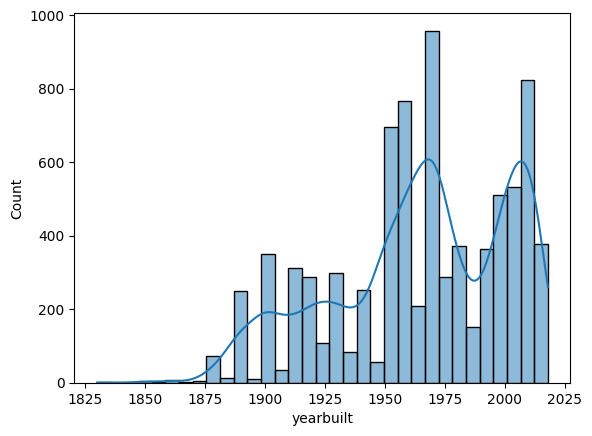

In [23]:
df_2 = mhp_df[~(mhp_df['yearbuilt']<1800)]
sns.histplot(data = df_2['yearbuilt'], kde=True)

In [24]:
# Percentage of data without a year built
print("Percentage of rows with missing 'yearbuilt' is {} %".format(round((1-(mhp_df['yearbuilt'].count()/mhp_df.shape[0]))*100, 2)))

Percentage of rows with missing 'yearbuilt' is 39.58 %


Nearly 40% of the rows do not have a 'yearbuilt' atribute

In [25]:
df_2['price'].corr(df_2['yearbuilt'])

-0.331827578196779

Since there is a strong negative correlation, it would be better to use the feature in our model, and we can add a feature that informs whether yearbuilt was present.

#### Car Parking Spots

In [26]:
df_2[df_2['car'].isnull()].head()

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,...,car,landsize,buildingarea,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount,car_fl
12221,Ascot Vale,132 The Parade,3,h,985000.0,S,Brad,3/09/2017,4.3,3032.0,...,NaN,245.0,91.0,1945.0,None,-37.77215,144.91144,Western Metropolitan,6567.0,0.0
12247,Brunswick East,18 Ethel St,2,h,1023000.0,S,Domain,3/09/2017,4.0,3057.0,...,NaN,154.0,76.0,1890.0,None,-37.77221,144.97537,Northern Metropolitan,5533.0,0.0
12259,Clifton Hill,34 Fenwick St,3,h,1436000.0,S,Jellis,3/09/2017,3.6,3068.0,...,NaN,123.0,128.0,1990.0,None,-37.78888,145.00036,Northern Metropolitan,2954.0,0.0
12320,Glen Waverley,19 Diamond Av,3,h,1370000.0,S,Fletchers,3/09/2017,16.7,3150.0,...,NaN,652.0,NaN,NaN,None,-37.87170,145.17267,Eastern Metropolitan,15321.0,0.0
12362,Newport,11 Collingwood Rd,4,h,1180000.0,PI,Williams,3/09/2017,6.2,3015.0,...,NaN,545.0,NaN,NaN,None,-37.84399,144.89125,Western Metropolitan,5498.0,0.0


In [27]:
print("Corrrelation between carparking spots and price is {}".format(round(df_2['car'].corr(df_2['price']), 2)))
print("Corrrelation between carparking spots and price after filling null values with zero is {}".format(round(df_2['car_fl'].corr(df_2['price']), 2)))

Corrrelation between carparking spots and price is 0.24
Corrrelation between carparking spots and price after filling null values with zero is 0.23


#### Landsize

The original data mentions that the landsize is in meters.. It is most probably in square meters.

In [28]:
print("Corrrelation between Landsize and price is {}".format(round(mhp_df['landsize'].corr(mhp_df['price']), 2)))
print("Percentage of missing Landsize {}%.".format(round(mhp_df['landsize'].isnull().mean()*100, 2)))

Corrrelation between Landsize and price is 0.04
Percentage of missing Landsize 0.0%.


In [29]:
df_2['landsize'].describe()

count     13579.000000
mean        558.397820
std        3990.815622
min           0.000000
25%         177.000000
50%         440.000000
75%         651.000000
max      433014.000000
Name: landsize, dtype: float64

<Axes: xlabel='landsize', ylabel='Count'>

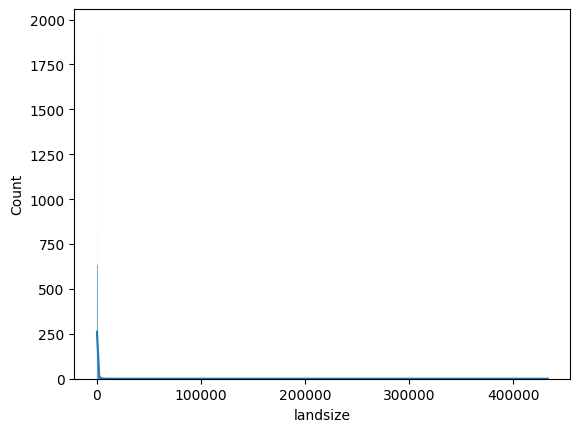

In [30]:
sns.histplot(data=mhp_df['landsize'], kde=True)

We can see that the standard devation is large. We can check how many outliers are there.

In [31]:
landsize_mean = df_2['landsize'].mean()
landsize_std = df_2['landsize'].std()
df_2[df_2['landsize']>(landsize_mean+landsize_std)].shape[0]

75

<Axes: xlabel='landsize', ylabel='Count'>

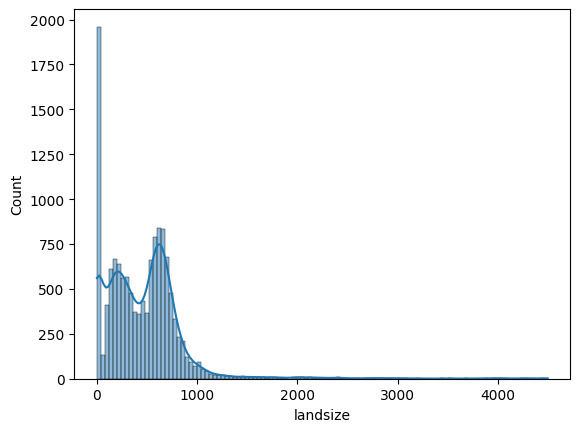

In [32]:
df_t2 = df_2[~(df_2['landsize']>(landsize_mean+landsize_std))]
sns.histplot(data=df_t2['landsize'], kde=True)

In [33]:
df_t2[df_t2['landsize']==0].shape[0]

1939

Although there are nio missing data, there seems to be a lot of rows where landsize is zero.

We can try normalising the data

In [34]:
df_t2 = df_2.copy()
df_t2['landsize_log'] = np.log(df_t2['landsize']+1)

In [35]:
print("Corrrelation between Landsize and price is {}".format(round(mhp_df['price'].
                                                                   corr(
                                                                        pd.Series(
                                                                            np.log(mhp_df['landsize']+1)
                                                                            )
                                                                        ), 2)))

Corrrelation between Landsize and price is 0.31


We can see that there is an increase in correlation after normalising the data.

<Axes: xlabel='landsize', ylabel='Count'>

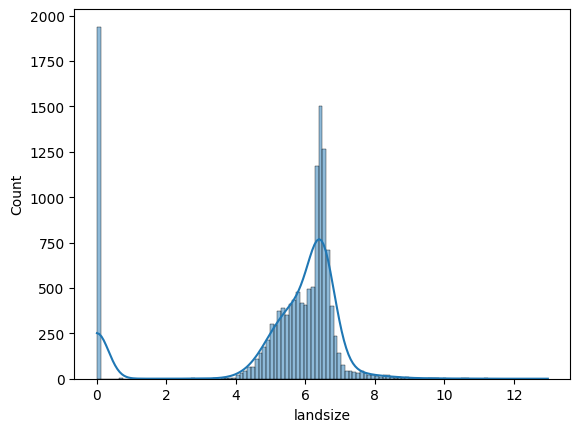

In [36]:
sns.histplot(data=np.log(df_t2['landsize']+1), kde=True)

In [37]:
# Removing zero landsize and outliers with large landsizes
df_t3 = df_t2[df_t2['landsize']!=0]
df_t3 = df_t3[~(df_t3['landsize']>(landsize_mean+landsize_std))]
s_t1 = df_t3['landsize'].sort_values(ascending=True)
df_t3['landsize'].describe()

count    11565.000000
mean       533.213662
std        406.091540
min          1.000000
25%        268.000000
50%        531.000000
75%        672.000000
max       4497.000000
Name: landsize, dtype: float64

<Axes: xlabel='landsize', ylabel='Count'>

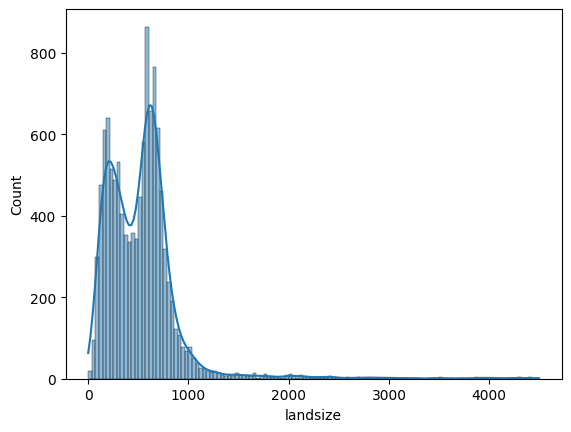

In [38]:
sns.histplot(data=df_t3['landsize'], kde=True)

<Axes: xlabel='landsize', ylabel='Count'>

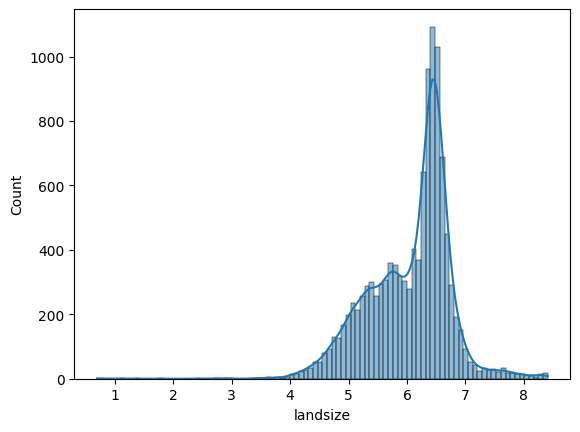

In [39]:
# Normalised data
sns.histplot(data=np.log(df_t3['landsize']+1), kde=True)

In [40]:
df_t3['landsize_log'] = np.log(df_t3['landsize']+1)

In [41]:
df_t3['landsize_log'].describe()

count    11565.000000
mean         6.057801
std          0.697543
min          0.693147
25%          5.594711
50%          6.276643
75%          6.511745
max          8.411388
Name: landsize_log, dtype: float64

In [42]:
df_t4 = df_t3[df_t3['landsize_log']>
      df_t3['landsize_log'].mean()-df_t3['landsize_log'].std()
]
df_t4['landsize'].describe()

count    9499.000000
mean      617.249395
std       401.061743
min       212.000000
25%       396.000000
50%       586.000000
75%       700.000000
max      4497.000000
Name: landsize, dtype: float64

In [43]:
df_t4['landsize'].corr(df_t4['price'])

0.01995840571473129

In [44]:
df_t4['price'].corr(df_t4['landsize_log'])

0.08310690542244767

In [45]:
df_t3['price'].corr(df_t3['landsize_log'])

0.1759495708371211

It's better to keep all values and just remove the extremely large landsize values as theere are only 75 of them. ANd then add a log feature.

In [46]:
landsize_mean = df_2['landsize'].mean()
landsize_std = df_2['landsize'].std()
df_2[df_2['landsize']>(landsize_mean+landsize_std)].shape[0]

75

In [47]:
df_3 = df_2[~(df_2['landsize']>(landsize_mean+landsize_std))]
df_3.shape

(13504, 22)

In [48]:
df_3['landsize_log'] = np.log(df_3['landsize']+1)

/var/folders/cl/5hxvrc8112x6sgzlbl_xdtk80000gp/T/ipykernel_5871/1120525214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['landsize_log'] = np.log(df_3['landsize']+1)


In [49]:
print("Corrrelation between Landsize log and price is {}".format(round(df_3['price'].
                                                                   corr(df_3['landsize_log']), 2)))

Corrrelation between Landsize log and price is 0.31


### Analysis of Categorical Features

In [50]:
df_3[mhp_df_cat].describe()

,suburb,address,type,method,sellerg,date,councilarea,regionname
count,13504,13504,13504,13504,13504,13504,12144,13504
unique,312,13302,3,5,268,58,33,8
top,Reservoir,5 Margaret St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,357,3,9427,8975,1558,470,1161,4661


In [51]:
df_3[mhp_df_cat].head()

,suburb,address,type,method,sellerg,date,councilarea,regionname
0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra,Northern Metropolitan
3,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,Yarra,Northern Metropolitan
4,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra,Northern Metropolitan


In [52]:
df_3[mhp_df_cat].nunique()

suburb           312
address        13302
type               3
method             5
sellerg          268
date              58
councilarea       33
regionname         8
dtype: int64

In [53]:
# Percetage of missing data
df_3[mhp_df_cat].isnull().mean()*100

suburb          0.00000
address         0.00000
type            0.00000
method          0.00000
sellerg         0.00000
date            0.00000
councilarea    10.07109
regionname      0.00000
dtype: float64

#### Suburb

In [54]:
df_t4 = df_3['suburb'].value_counts()
df_t4

Reservoir             357
Richmond              253
Bentleigh East        249
Preston               239
Brunswick             220
                     ... 
Upwey                   1
Beaconsfield Upper      1
Croydon South           1
Riddells Creek          1
Monbulk                 1
Name: suburb, Length: 312, dtype: int64

<Figure size 1500x800 with 0 Axes>

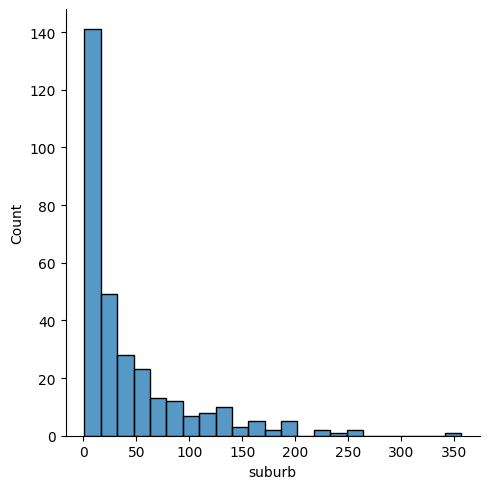

In [55]:
plt.figure(figsize=(15, 8))
sns.displot(df_t4)

In [56]:
df_t4.describe()

count    312.000000
mean      43.282051
std       54.833603
min        1.000000
25%        6.750000
50%       21.000000
75%       59.250000
max      357.000000
Name: suburb, dtype: float64

In [57]:
df_t5 = df_t4[df_t4>20]
df_t5.count()

157

We can try one hot encoding the suburb but it might be better to remove the feature as we already have latitude and longitude

#### Method of sale
<ul>
        <li>S - property sold; </li>
        <li> SP - property sold prior; </li>
        <li> PI - property passed in; </li>
        <li> PN - sold prior not disclosed; </li>
        <li> SN - sold not disclosed; </li>
        <li> NB - no bid; </li>
        <li> VB - vendor bid; </li>
        <li> W - withdrawn prior to auction; </li>
       <li>  SA - sold after auction; </li>
       <li>  SS - sold after auction price not disclosed. </li>
       <li>  N/A - price or highest bid not available.</li>
</ul>

In [58]:
df_3['method'].value_counts()

S     8975
SP    1695
PI    1551
VB    1192
SA      91
Name: method, dtype: int64

In [59]:
df_3[df_3['method']=='PI'].head()

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,...,landsize,buildingarea,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount,car_fl,landsize_log
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,1.0,4.553877
20,Abbotsford,3/72 Charles St,4,h,1330000.0,PI,Kay,18/03/2017,2.5,3067.0,...,780.0,135.0,1900.0,Yarra,-37.8073,144.9952,Northern Metropolitan,4019.0,2.0,6.660575
24,Abbotsford,52a William St,2,h,1100000.0,PI,Biggin,18/06/2016,2.5,3067.0,...,124.0,135.0,2013.0,Yarra,-37.8079,144.9977,Northern Metropolitan,4019.0,1.0,4.828314
27,Abbotsford,48 Abbotsford St,3,h,1447500.0,PI,Nelson,22/08/2016,2.5,3067.0,...,166.0,174.0,2012.0,Yarra,-37.8017,145.0001,Northern Metropolitan,4019.0,1.0,5.117994
38,Airport West,154 Halsey Rd,3,t,840000.0,PI,Nelson,3/09/2016,13.5,3042.0,...,303.0,225.0,2016.0,Moonee Valley,-37.7180,144.8780,Western Metropolitan,3464.0,1.0,5.717028


PI implies property was passed inn, but even they have a sold date. So it would be better to remove this feature.

#### Type
<ul>
        <li>br - bedroom(s); </li>
        <li>h - house,cottage,villa, </li>
        <li>semi,terrace; </li>
        <li>u - unit, duplex; </li>
        <li>t - townhouse; </li>
        <li>dev site - development site; </li>
        <li>o res - other residential.</li>
</ul>

In [60]:
df_3['type'].value_counts()

h    9427
u    2968
t    1109
Name: type, dtype: int64

We can try one hot encoding with these three values and ignore the 'h' type as this has the majority and any other type would fall into it

#### SellerG: Real Estate Agent

In [61]:
df_3['sellerg'].value_counts().head(20)

Nelson           1558
Jellis           1307
hockingstuart    1156
Barry            1010
Ray               695
Marshall          655
Buxton            629
Biggin            386
Brad              340
Fletchers         300
Woodards          299
Jas               243
Greg              238
McGrath           217
Sweeney           216
Noel              204
Miles             196
RT                184
Gary              170
Harcourts         167
Name: sellerg, dtype: int64

In [62]:
df_t6 = df_3['sellerg'].value_counts()
min_sale = 50
print("Percentage of seller who sold more than {} properties  = {}%".format(min_sale, round(((df_t6>min_sale).sum()/df_t6.count())*100, 2)))
print("Number of seller who sold more than {} properties  = {}".format(min_sale, (df_t6>min_sale).sum()))

Percentage of seller who sold more than 50 properties  = 14.55%
Number of seller who sold more than 50 properties  = 39


We'll treat sellers who sold less than 50 houses as a single category "others"

#### Council area

In [63]:
df_3['councilarea'].nunique()

33

In [64]:
df_t7 = df_3['councilarea'].value_counts(ascending=True)
df_t7

Moorabool               1
Unavailable             1
Macedon Ranges          6
Cardinia                8
Yarra Ranges           16
Nillumbik              36
Casey                  38
Frankston              52
Greater Dandenong      52
Melton                 66
Maroondah              80
Knox                   80
Wyndham                85
Hume                  164
Whittlesea            167
Kingston              207
Whitehorse            304
Manningham            310
Monash                332
Brimbank              424
Hobsons Bay           434
Melbourne             467
Bayside               488
Banyule               594
Port Phillip          618
Yarra                 634
Maribyrnong           684
Stonnington           708
Glen Eira             846
Darebin               931
Moonee Valley         995
Boroondara           1155
Moreland             1161
Name: councilarea, dtype: int64

In [65]:
df_t7[df_t7>100].count()

20

Since Latitude and Longtitude are present we can try to avoid council are and pincode and try to stick to using the coordinates and maybe region name

#### Region Name

In [66]:
df_3['regionname'].nunique()

8

In [67]:
df_3['regionname'].value_counts()

Southern Metropolitan         4661
Northern Metropolitan         3868
Western Metropolitan          2936
Eastern Metropolitan          1469
South-Eastern Metropolitan     449
Eastern Victoria                51
Northern Victoria               38
Western Victoria                32
Name: regionname, dtype: int64

<Axes: xlabel='lattitude', ylabel='longtitude'>

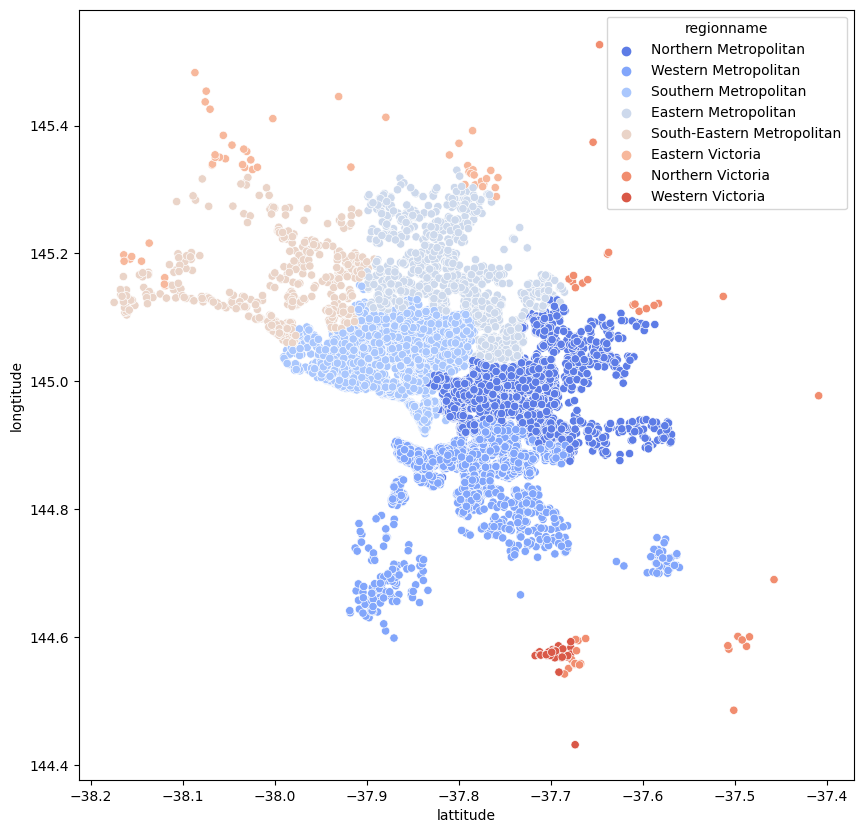

In [68]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='lattitude', y='longtitude', data=df_3, hue='regionname', palette='coolwarm')

#### Selling Date

In [69]:
df_3['date'].describe()

count          13504
unique            58
top       27/05/2017
freq             470
Name: date, dtype: object

In [70]:
df_3['date'].dtype

dtype('O')

In [71]:
df_3['sold_date'] = pd.to_datetime(df_3['date'], format='%d/%m/%Y')

/var/folders/cl/5hxvrc8112x6sgzlbl_xdtk80000gp/T/ipykernel_5871/2194374836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['sold_date'] = pd.to_datetime(df_3['date'], format='%d/%m/%Y')


In [72]:
df_3['year_sold'] = df_3['sold_date'].dt.year
df_3['month_sold'] = df_3['sold_date'].dt.month
df_3['day_sold'] = df_3['sold_date'].dt.day
df_3.head()

/var/folders/cl/5hxvrc8112x6sgzlbl_xdtk80000gp/T/ipykernel_5871/2741731901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['year_sold'] = df_3['sold_date'].dt.year
/var/folders/cl/5hxvrc8112x6sgzlbl_xdtk80000gp/T/ipykernel_5871/2741731901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['month_sold'] = df_3['sold_date'].dt.month
/var/folders/cl/5hxvrc8112x6sgzlbl_xdtk80000gp/T/ipykernel_5871/2741731901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,...,lattitude,longtitude,regionname,propertycount,car_fl,landsize_log,sold_date,year_sold,month_sold,day_sold
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,-37.7996,144.9984,Northern Metropolitan,4019.0,1.0,5.313206,2016-12-03,2016,12,3
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,-37.8079,144.9934,Northern Metropolitan,4019.0,0.0,5.056246,2016-02-04,2016,2,4
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,-37.8093,144.9944,Northern Metropolitan,4019.0,0.0,4.905275,2017-03-04,2017,3,4
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,-37.7969,144.9969,Northern Metropolitan,4019.0,1.0,4.553877,2017-03-04,2017,3,4
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,-37.8072,144.9941,Northern Metropolitan,4019.0,2.0,4.795791,2016-06-04,2016,6,4


In [73]:
df_3['year_sold'].describe()

count    13504.000000
mean      2016.532065
std          0.498989
min       2016.000000
25%       2016.000000
50%       2017.000000
75%       2017.000000
max       2017.000000
Name: year_sold, dtype: float64

In [74]:
df_3['yearbuilt'].describe()

count    8157.000000
mean     1964.624127
std        36.269784
min      1830.000000
25%      1940.000000
50%      1970.000000
75%      1999.000000
max      2018.000000
Name: yearbuilt, dtype: float64

There seems to be a few houses that are built in 2018 but the latest year of sale is 2017

In [75]:
df_t8 = df_3[~(df_3['yearbuilt'].isnull())]
df_t9 = df_t8[(df_t8['year_sold']-df_t8['yearbuilt'])<0]
df_t9[['date' ,'year_sold', 'yearbuilt']]

,date,year_sold,yearbuilt
441,3/12/2016,2016,2017.0
1234,24/09/2016,2016,2018.0
3489,23/04/2016,2016,2017.0
4282,28/05/2016,2016,2017.0
5153,17/09/2016,2016,2017.0
7060,30/07/2016,2016,2017.0


In [76]:
# Properties built after 2017
df_t8[df_t8['yearbuilt']>2016]

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,...,lattitude,longtitude,regionname,propertycount,car_fl,landsize_log,sold_date,year_sold,month_sold,day_sold
441,Avondale Heights,157 Canning St,3,t,851000.0,S,Nelson,3/12/2016,10.5,3034.0,...,-37.77000,144.85720,Western Metropolitan,4502.0,1.0,6.324359,2016-12-03,2016,12,3
1234,Brighton East,8 Thomas St,2,h,1310000.0,S,Buxton,24/09/2016,10.7,3187.0,...,-37.91820,145.02310,Southern Metropolitan,6938.0,2.0,5.713733,2016-09-24,2016,9,24
2873,Glenroy,2 Roy St,4,h,550000.0,VB,Peter,4/03/2017,13.0,3046.0,...,-37.69640,144.93140,Northern Metropolitan,8870.0,1.0,6.527958,2017-03-04,2017,3,4
3489,Keilor East,20 Keith Gr,3,h,825000.0,S,Nelson,23/04/2016,12.8,3033.0,...,-37.73780,144.87050,Western Metropolitan,5629.0,1.0,6.447306,2016-04-23,2016,4,23
4282,Newport,7 Durkin St,3,h,945000.0,S,Jas,28/05/2016,8.4,3015.0,...,-37.84380,144.88060,Western Metropolitan,5498.0,1.0,6.190315,2016-05-28,2016,5,28
5153,Reservoir,89 Darebin Bvd,4,h,767500.0,S,Barry,17/09/2016,11.2,3073.0,...,-37.70400,145.02990,Northern Metropolitan,21650.0,2.0,6.727432,2016-09-17,2016,9,17
7060,Heidelberg,36 Buckingham Dr,3,h,1030000.0,S,Miles,30/07/2016,10.6,3084.0,...,-37.75010,145.08220,Eastern Metropolitan,2890.0,2.0,6.476972,2016-07-30,2016,7,30
8134,Newport,17 Gordon St,3,t,900000.0,S,Greg,13/05/2017,8.4,3015.0,...,-37.83890,144.86660,Western Metropolitan,5498.0,2.0,6.356108,2017-05-13,2017,5,13
10733,Maidstone,19/8 Crefden St,2,u,435000.0,S,Biggin,8/07/2017,6.4,3012.0,...,-37.77813,144.87287,Western Metropolitan,3873.0,1.0,0.000000,2017-07-08,2017,7,8
10809,Sandringham,154 Abbott St,4,h,850000.0,PI,McGrath,8/07/2017,15.2,3191.0,...,-37.95095,145.02096,Southern Metropolitan,4497.0,2.0,6.565265,2017-07-08,2017,7,8


Since there are just 19 rows. We can try removing houses which seem to have been built after 2017. An alternative idea is that the property might have been sold before the actual building was completed.

### Further Analysis

In [77]:
num_cols =df_3.select_dtypes(exclude='object').columns
num_cols

Index(['rooms', 'price', 'distance', 'postcode', 'bedroom2', 'bathroom', 'car',
       'landsize', 'buildingarea', 'yearbuilt', 'lattitude', 'longtitude',
       'propertycount', 'car_fl', 'landsize_log', 'sold_date', 'year_sold',
       'month_sold', 'day_sold'],
      dtype='object')

/var/folders/cl/5hxvrc8112x6sgzlbl_xdtk80000gp/T/ipykernel_5871/3883605731.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_3[num_cols].corr(), annot=True, cmap='YlGnBu')


<Axes: >

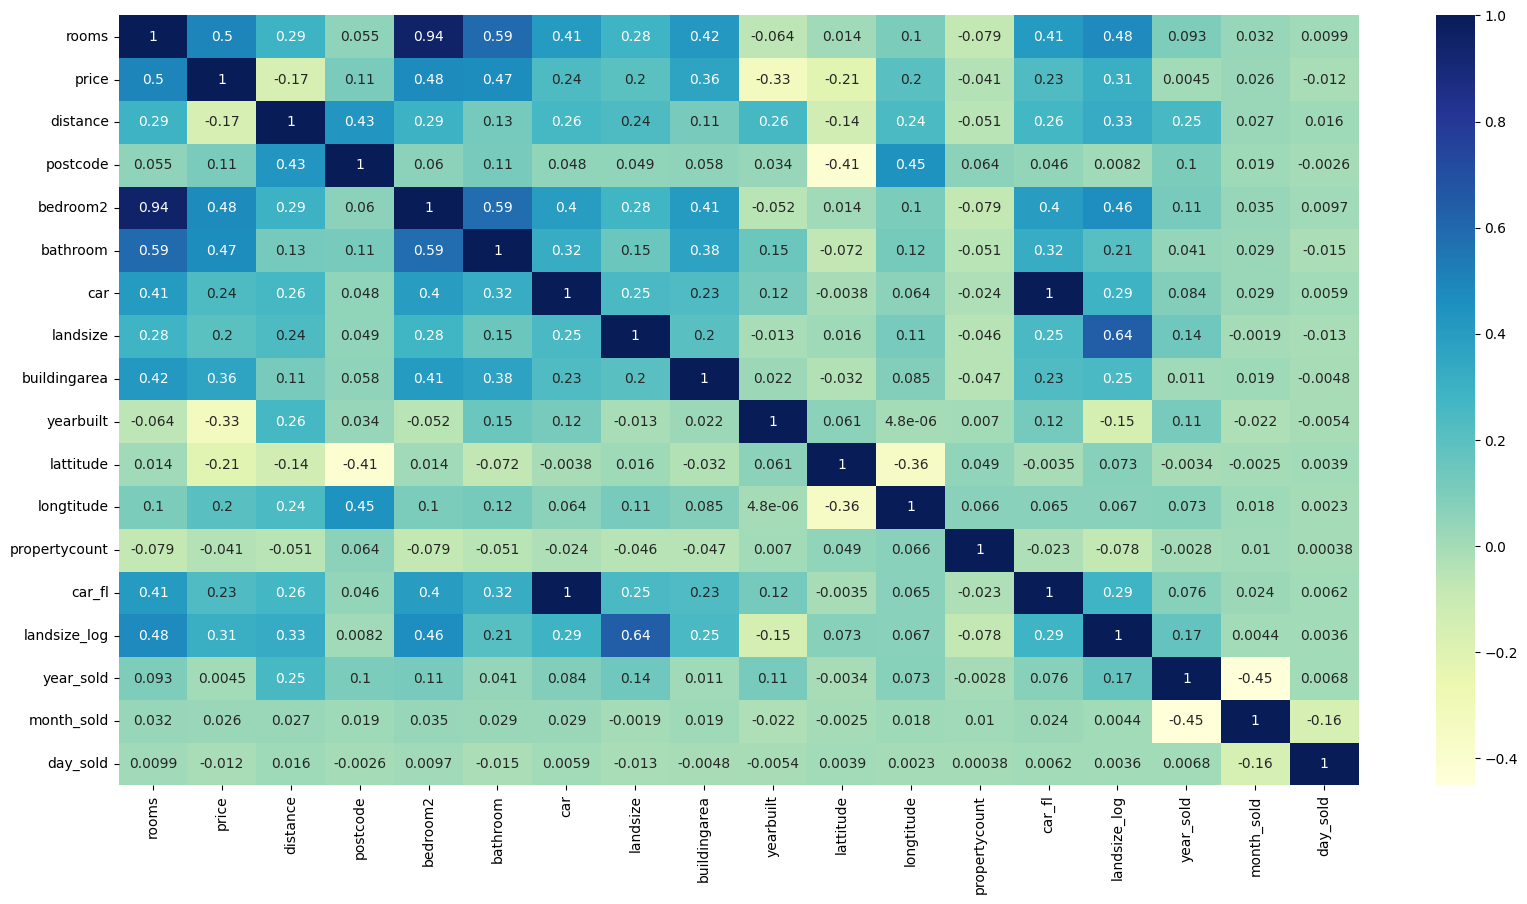

In [78]:
plt.figure(figsize=(20,10))
sns.heatmap(df_3[num_cols].corr(), annot=True, cmap='YlGnBu')

#### Feature Engineering

In [79]:
df_4 = df_3.copy()

In [80]:
df_4['landsize_per_propcount']= df_4['landsize_log']/df_4['propertycount']
df_4['price'].corr(df_4['landsize_per_propcount'])

0.06060097999954491

In [81]:
suburb_counts = df_4.groupby('suburb')['propertycount'].nunique().reset_index()
suburb_counts[suburb_counts['propertycount']>1]

,suburb,propertycount


The suburb seems to be tied to the priperty count feature. We can therefore remove the suburb feature as already mentioned

##### COmbinations of features based on PCA

In [82]:
df_4['total_RBC']= (df_4['rooms']+df_4['bathroom']+df_4['car_fl'])
df_4['price'].corr(df_4['total_RBC'])

0.49416915213844514

It would be better not to use this feature in Linear regression as it might be redundant

In [83]:
df_4['landbtroom_per_propcount']= df_4['landsize_log']*(df_4['bathroom'])*1000/df_4['propertycount']
df_4['price'].corr(df_4['landbtroom_per_propcount'])

0.1896054552505265

In [84]:
df_4['landbtroomcar_per_propcount']= df_4['landsize_log']*(df_4['bathroom']+df_4['car_fl'])*1000/df_4['propertycount']
df_4['price'].corr(df_4['landbtroomcar_per_propcount'])

0.15695550200601852

In [85]:
df_5=df_4.copy()
df_5['yearbuilt']=df_5['yearbuilt'].fillna(df_5['yearbuilt'].mean())
display(df_4['price'].corr(df_4['yearbuilt']))
display(df_5['price'].corr(df_5['yearbuilt']))

-0.3314850635401569

-0.2685233905404753

### Summary

#### Columns
<ul>
        <li style="color: red;">Suburb      - Remove as we already have latitude and longtitude. When user selects a Suburb, the property count should automatically appear </li>
        <li style="color: red;"> Address     - Drop </li>
        <li>Rooms       - Keep as it is </li>
        <li>Type        - One Hot encode </li>
        <li>Price       - Target </li>
        <li style="color: red;">Method      - Drop </li>
        <li>SellerG     - One Hot ENcode sellers who have sold more than 50 houses rest in "Other" </li>
        <li style="color: red;">Date        - Convert to datetime and drop</li>
        <li>Distance    - Keep as it is </li>
        <li>Postocde    - CHeck whether to keep or remove based on scores </li>
        <li style="color: red;">Bedroom2    - Drop </li>
        <li>Bathroom    - Keep as it is </li>
        <li>Car         - Fill NA with zero and keep </li>
        <li>Landsize    - Remove large landsies (larger than mean+std) </li>
        <li style="color: red;">Buildingarea- Drop </li>
        <li>Yearbuilt   - Feature is important, try adding a binary column for rows with missing data </li>
        <li style="color: red;">Council Area- Drop </li>
        <li>Lattitude   - Keep as it is </li>
        <li>Longtitude  - Keep as it is </li>
        <li>RegionName  - One Hot encode </li>
        <li>Proprtycount- Keep as it is </li>
</ul>

#### New Features
<ul>
        <li>Year, Month, Day            - From Date </li>
        <li>Lnadsize_log                - Log of Landize </li>
        <li>Sold Date                   - To split Data for Test and Train </li>
        <li>landsize_per_propcounts     - Landsize(log) / Property Count </li>
        <li>Total_RBC                   - Sum of Room, Bathrooms and Car Parking Spots</li>
        <li>landbtroom_per_propcount    - Landsize(log) X #Bathrooms / Property Count </li>
        <li>landbtroomcar_per_propcount - Landsize(log) X #Bathrooms X #Car Parking Spots/ Property Count </li>
</ul>

### Exploring Suburb and Property Count


In [3]:
mhp_df

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,...,bathroom,car,landsize,buildingarea,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,None,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,None,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,None,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,None,-37.85908,144.89299,Western Metropolitan,6380.0


In [5]:
mhp_df.nunique()

suburb             314
address          13378
rooms                9
type                 3
price             2204
method               5
sellerg            268
date                58
distance           202
postcode           198
bedroom2            12
bathroom             9
car                 11
landsize          1448
buildingarea       602
yearbuilt          144
councilarea         33
lattitude         6503
longtitude        7063
regionname           8
propertycount      311
dtype: int64

In [19]:
grouped = mhp_df.groupby(['suburb', 'propertycount'])

In [26]:
unique_combinations = grouped.size().reset_index()
unique_combinations.columns = ['suburb', 'propertycount', 'count']

In [27]:
unique_combinations

,suburb,propertycount,count
0,Abbotsford,4019.0,56
1,Aberfeldie,1543.0,44
2,Airport West,3464.0,67
3,Albanvale,1899.0,6
4,Albert Park,3280.0,69
...,...,...,...
309,Wonga Park,1328.0,1
310,Wyndham Vale,5262.0,4
311,Yallambie,1369.0,24
312,Yarra Glen,1160.0,1


In [30]:
unique_combinations[unique_combinations.duplicated(subset=['propertycount'], keep=False)]

,suburb,propertycount,count
48,Brunswick West,7082.0,110
57,Cairnlea,2674.0,7
138,Glenroy,8870.0,159
153,Heidelberg West,2674.0,76
282,Thornbury,8870.0,139
293,Wantirna South,7082.0,22


The above are the suburbs having same propertycounts.